# Project: Ensemble Techniques - Travel Package Purchase Prediction

## Background and Context
You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

#### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Best Practices for Notebook : 

* The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
* The notebook should be run from start to finish in a sequential manner before submission.
* It is preferable to remove all warnings and errors before submission.
* The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)

### Submission Guidelines :

1. There are two parts to the submission: 
    1. A well commented Jupyter notebook [format - .ipynb]
    2. File converted to HTML format 
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4. Submission will not be evaluated if,
    1. it is submitted post-deadline, or,
    2. more than 2 files are submitted

Happy Learning!!

## Scoring guide (Rubric) - Travel Package Purchase Prediction

| Criteria  | Points |
| --------- | ------ |
| Perform an Exploratory Data Analysis on the data  | 8  |
| Illustrate the insights based on EDA  | 4  |
| Data Pre-processing  | 7  |
| Model building - Bagging  | 4  |
| Model performance improvement - Bagging  | 9  |
| Model building - Boosting  | 6  |
| Model performance improvement - Boosting  | 9  |
| Model performance evaluation   |  4   |
| Actionable Insights & Recommendations   |  5  |
| Notebook - Overall    |  4   |

## Environment Setup

We will import all the libraries/packages that we would need for performing EDA, model building and model evaluations in beginning to be able to focus purely on the above listed tasks for the rest of the notebook.

We will need the following:
* Pandas: For working with dataframes.
* Numpy: For working with arrays and collections.
* MatplotLib: for plotting functions.
* Seaborn: for producing high quality visualizations.
* Warnings: To avoid listing warnings in our notebook to keep it tidy
* Scikit Learn: For using algorithms for Bagging, Boosting and Stacking models.
* XGBoost: for XGBoost model implementation.

#### Note:
I am using a conda (miniconda) environment on my machine with the following libraries and language versions. The ```environment.yml``` file is listed below so that the evaluator can run the notebook in the same environment as I did.

```yaml
name: gl-tensorflow
dependencies:
    - python=3.7
    - pip>=20.0
    - jupyter
    - tensorflow=2.0
    - scikit-learn
    - scipy
    - pandas>=1.0.1
    - pandas-datareader
    - matplotlib
    - pillow
    - tqdm
    - requests
    - h5py
    - pyyaml
    - flask
    - boto3
    - xgboost
    - openpyxl
    - scikit-learn-intelex
    - seaborn
    - pip:
        - bayesian-optimization
        - gym
        - kaggle
```

To create this enviroment on your machine follow the below steps:
1. Install miniconds
2. Create a new yaml file called ```gl-tensorflow.yml``` and paste the above yaml content in your file.
3. Install the following command from your terminal

```bash
conda create -n gl-tensorflow --file gl-tensorflow.yml
conda activate gl-tensorflow
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# use the inline backend for matplotlib to render output inline in the notebook.
%matplotlib inline
import seaborn as sns
# needed to turn of render of warnings in notebook outputs
import warnings
warnings.filterwarnings('ignore')
# scikit-learn ecosystem
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier 
# XGBoost
from xgboost import XGBClassifier

# a patch for speeding up the sklearn operations on Intel hardware.
# I have a Macbook Pro and I see good performance gains - please comment out the below part if you don't need it.
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Data Loading

In the project we have the data available in an Excel Spreadsheet with 2 worksheets. The first worksheet contains the details about different columns in data. Although we won't need this worksheet for any of our tasks - it would be still nice to have it in a data frame to be able to quickly print the overview of columns when needed inline rather than requiring to opening up the excel spreadsheet separately.

The second worksheet in the spreadsheet contains the observations using which we want to train/test our models.

Let's import the data to get started.

In [2]:
# Load the data directly from Excel sheet
# Load the first sheet for an overview of the columns and their data types etc.
data_dictionary = pd.read_excel('Tourism.xlsx', sheet_name='Data Dict', engine='openpyxl')
# Load the second sheet with the actual data
customer_travel_package_data = pd.read_excel('Tourism.xlsx', sheet_name='Tourism', engine='openpyxl')

In [3]:
# Format the dataframes because the in the Data Dict sheet we have an extra row and column in the beginning
data_dictionary.drop('Unnamed: 0', axis=1, inplace=True)
data_dictionary.drop([0], inplace=True)
data_dictionary.rename(columns={"Unnamed: 1":"Dataset", "Unnamed: 2":"ColumnName", "Unnamed: 3":"Description"}, inplace=True)
# create a small helper function to print the data dict. when needed for easy visualization
data_dictionary

,Dataset,ColumnName,Description
1,Tourism,CustomerID,Unique customer ID
2,Tourism,ProdTaken,Whether the customer has purchased a package o...
3,Tourism,Age,Age of customer
4,Tourism,TypeofContact,How customer was contacted (Company Invited or...
5,Tourism,CityTier,City tier depends on the development of a city...
6,Tourism,DurationOfPitch,Duration of the pitch by a salesperson to the ...
7,Tourism,Occupation,Occupation of customer
8,Tourism,Gender,Gender of customer
9,Tourism,NumberOfPersonVisiting,Total number of persons planning to take the t...
10,Tourism,NumberOfFollowups,Total number of follow-ups has been done by sa...


In [4]:
customer_travel_package_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# EDA

## General Understanding of the dataset

In order to gain a general understanding of the dataset we will do some simple tasks like:
- Looking at the shape of data
- Determining the quality of data - count of missing values vs total values in the dataset
- Information about the different columns on the dataset.
- Distribution of target variable (positive/yes vs negative/no)

In [5]:
# Study the general attributes about the dataset
print(f'Dataset Shape: {customer_travel_package_data.shape}')
missing_values_count = customer_travel_package_data.isna().sum().sum()
total_values_count = customer_travel_package_data.shape[0]*customer_travel_package_data.shape[1]
missing_values_percentage = (missing_values_count/total_values_count)*100
print(f'Missing Values: {missing_values_count} ({missing_values_percentage}%)\nTotal Values: {total_values_count}')

Dataset Shape: (4888, 20)
Missing Values: 1012 (1.03518821603928%)
Total Values: 97760


In [6]:
# Get information about various columns and their datatypes
customer_travel_package_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
# describe the dataset in terms of distribution of numeric values - some of the numeric values are actually categories
customer_travel_package_data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [8]:
# ratio of positive and negative values
customer_travel_package_data['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

### Insights about the dataset.

After poking around the data we can make these general observations around the dataset.
1. There are around 5k observations (4888 to be precise), each observation has 19 attributes (excluding the CustomerID which doesn't add any value for our use case)
2. We have a total of 1012 (roughly 1% of all data points) missing values. So in terms of quality - the data is not horrible.
3. The dataset has a lot of categorical variables (9 out of 19):
    1. TypeofContact
    2. CityTier
    3. Occupation
    4. Gender
    5. ProductPitched
    6. PreferredPropertyStar (although this is a number but the values are categories)
    7. MaritalStatus
    8. PitchSatisfactionScore (although this is a number but the values are categories)
    9. Designation
4. The dataset is skewed towards negative observations.

### Actions based on the above insights

Based on the above - we can drop off the column CustomerID right away as it would create unnecessary noise when doing multi-variate analysis.

In [9]:
#. drop the CustomerId column
customer_travel_package_data.drop('CustomerID', axis=1, inplace=True)
customer_travel_package_data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Univariate Analysis

Let's look at the. distribution of individual categorical data first and then we will try to take a look at the numerical variables.

###  Categorical Variables Univariate Analysis
* TypeofContact
* CityTier
* Occupation
* Gender
* ProductPitched
* PreferredPropertyStar (although it can be treated as numerical but it's not continuous - lets see if. having it as Category adds any value to model)
* MaritalStatus
* Designation

### Uniques per column

In [10]:
customer_travel_package_data.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [11]:
# find out the value counts for each column to see if we need to do something
print(f'TypeofContact: {customer_travel_package_data[["TypeofContact"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'CityTier: {customer_travel_package_data[["CityTier"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'Occupation: {customer_travel_package_data[["Occupation"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'Gender: {customer_travel_package_data[["Gender"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'ProductPitched: {customer_travel_package_data[["ProductPitched"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'PreferredPropertyStar: {customer_travel_package_data[["PreferredPropertyStar"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'MaritalStatus: {customer_travel_package_data[["MaritalStatus"]].value_counts(sort=True,ascending=False)}\n\n')
print(f'Designation: {customer_travel_package_data[["Designation"]].value_counts(sort=True,ascending=False)}\n\n')

TypeofContact: TypeofContact  
Self Enquiry       3444
Company Invited    1419
dtype: int64


CityTier: CityTier
1           3190
3           1500
2            198
dtype: int64


Occupation: Occupation    
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
dtype: int64


Gender: Gender 
Male       2916
Female     1817
Fe Male     155
dtype: int64


ProductPitched: ProductPitched
Basic             1842
Deluxe            1732
Standard           742
Super Deluxe       342
King               230
dtype: int64


PreferredPropertyStar: PreferredPropertyStar
3.0                      2993
5.0                       956
4.0                       913
dtype: int64


MaritalStatus: MaritalStatus
Married          2340
Divorced          950
Single            916
Unmarried         682
dtype: int64


Designation: Designation   
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
dtype: int64




### Some issues/insights based on the value counts for categorical values

From a general look at the categorical values we can say that some of the values need fixing.

* Gender: We need to update values 'Fe Male' to be 'Female'
* MaritalStatus: We do see 'Umarried' and 'Single' (which are same as far as I am concerned :laughing:) - however they might be an indicator of customer behavior (as in how they like to represent themselves and as such might have an impact on their buying decisions). I am keeping them as it is (atleast for the EDA part) and might experiment later.
* Things like CityTier and PreferredPropertyStar are categorical values and I am converting them to readable strings to aid visualization

In [12]:
def fix_female_values(value):
    if value=='Fe Male':
        return 'Female'
    return value
def city_tier_encoder(value):
    if value==1:
        return 'One'
    if value==2:
        return 'Two'
    if value==3:
        return 'Three'
def preferred_property_star(value):
    if value==3.0:
        return 'Three'
    if value==4.0:
        return 'Four'
    if value==5.0:
        return 'Five'
customer_travel_package_data['Gender']=customer_travel_package_data['Gender'].apply(fix_female_values)
customer_travel_package_data['CityTier']=customer_travel_package_data['CityTier'].apply(city_tier_encoder)
customer_travel_package_data['PreferredPropertyStar']=customer_travel_package_data['PreferredPropertyStar'].apply(preferred_property_star)

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

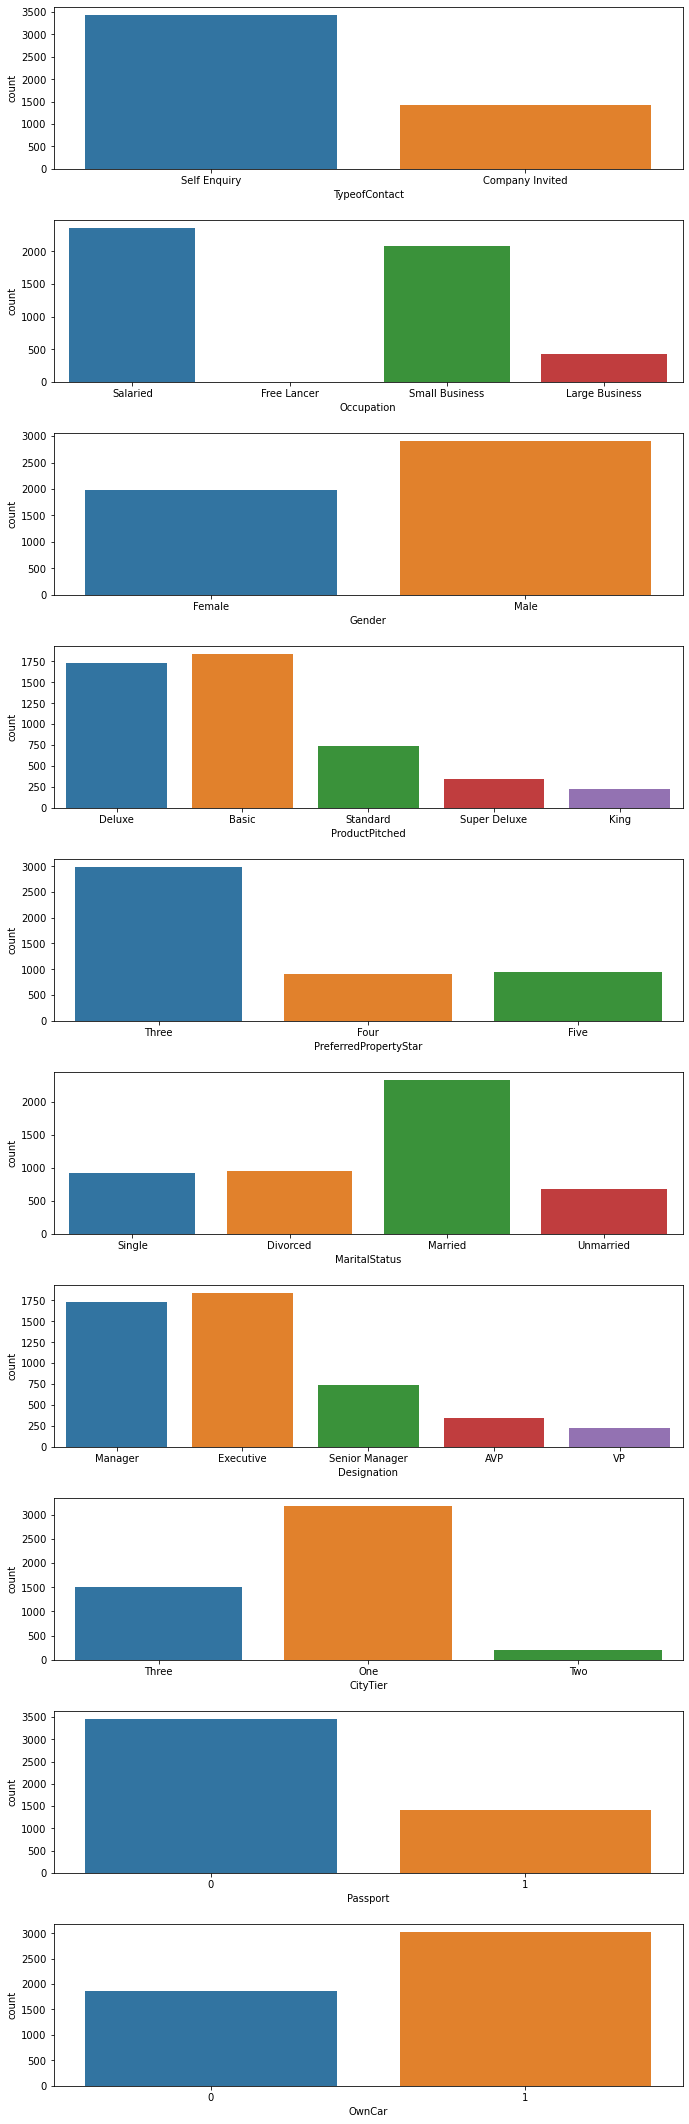

In [13]:
fig, axes = plt.subplots(10, 1, figsize=(10, 30), sharey=False)
fig.tight_layout(pad=3.0)
sns.countplot(data=customer_travel_package_data, x='TypeofContact',ax=axes[0])
sns.countplot(data=customer_travel_package_data, x='Occupation',ax=axes[1])
sns.countplot(data=customer_travel_package_data, x='Gender',ax=axes[2])
sns.countplot(data=customer_travel_package_data, x='ProductPitched',ax=axes[3])
sns.countplot(data=customer_travel_package_data, x='PreferredPropertyStar',ax=axes[4])
sns.countplot(data=customer_travel_package_data, x='MaritalStatus',ax=axes[5])
sns.countplot(data=customer_travel_package_data, x='Designation',ax=axes[6])
sns.countplot(data=customer_travel_package_data, x='CityTier',ax=axes[7])
sns.countplot(data=customer_travel_package_data, x='Passport',ax=axes[8])
sns.countplot(data=customer_travel_package_data, x='OwnCar',ax=axes[9])

### Numerical Values Univariate Analysis

In above data we have the following values which are numerical values.
* Age
* DurationOfPitch
* NumberOfPersonVisiting (discrete values)
* NumberOfFollowups (discrete values)
* NumberOfTrips (discrete values)
* PitchSatisfactionScore  (discrete values)
* NumberOfChildrenVisiting  (discrete values)
* MonthlyIncome

In addition to the above values we do have some binary variables (true/false) and we will review them along with the numerical values.

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

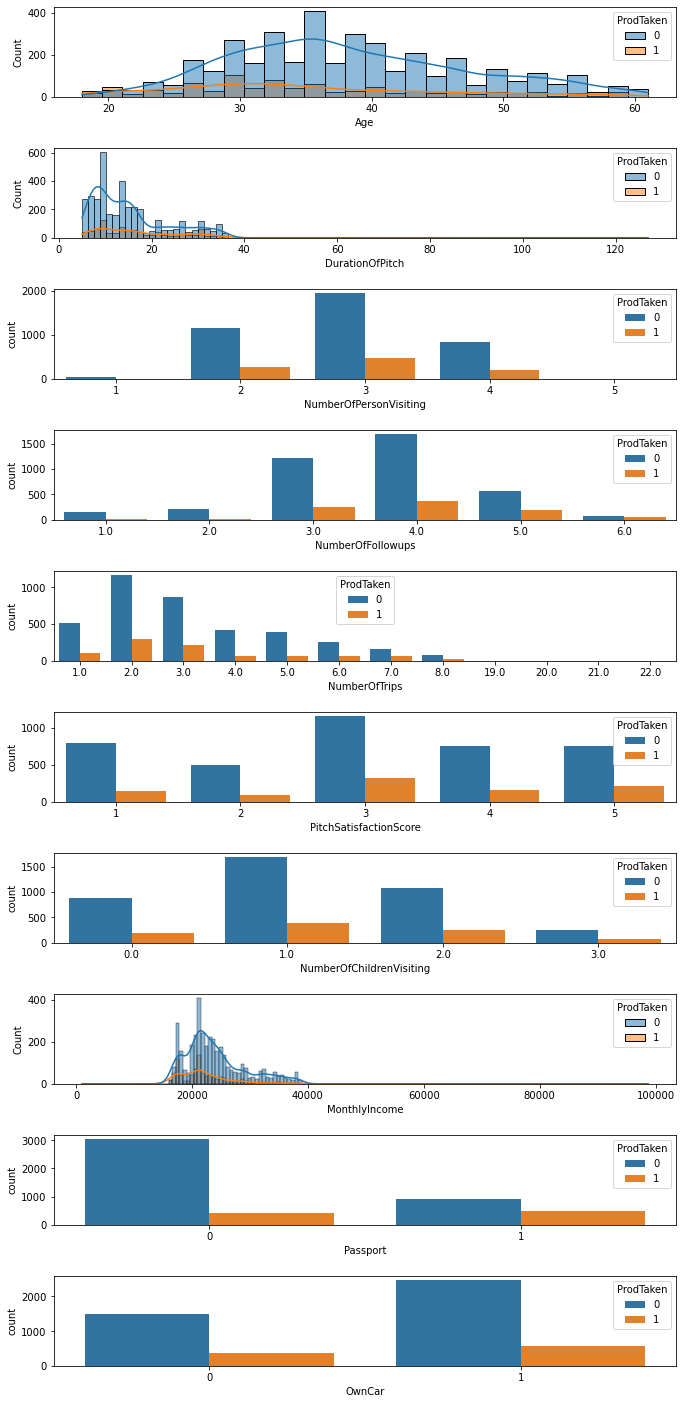

In [14]:
fig, axes = plt.subplots(10, 1, figsize=(10, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.histplot(data=customer_travel_package_data, hue='ProdTaken', x='Age',ax=axes[0], kde=True)
sns.histplot(data=customer_travel_package_data, hue='ProdTaken', x='DurationOfPitch',ax=axes[1], kde=True)
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='NumberOfPersonVisiting',ax=axes[2])
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='NumberOfFollowups',ax=axes[3])
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='NumberOfTrips',ax=axes[4])
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='PitchSatisfactionScore',ax=axes[5])
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='NumberOfChildrenVisiting',ax=axes[6])
sns.histplot(data=customer_travel_package_data, hue='ProdTaken', x='MonthlyIncome',ax=axes[7], kde=True)
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='Passport',ax=axes[8])
sns.countplot(data=customer_travel_package_data, hue='ProdTaken', x='OwnCar',ax=axes[9])

### Analysis of measures of central tendency

Let's try to analyze the variables like Age, DurationOfPitch and MonthlyIncome in terms of IQR.

<AxesSubplot:xlabel='MonthlyIncome'>

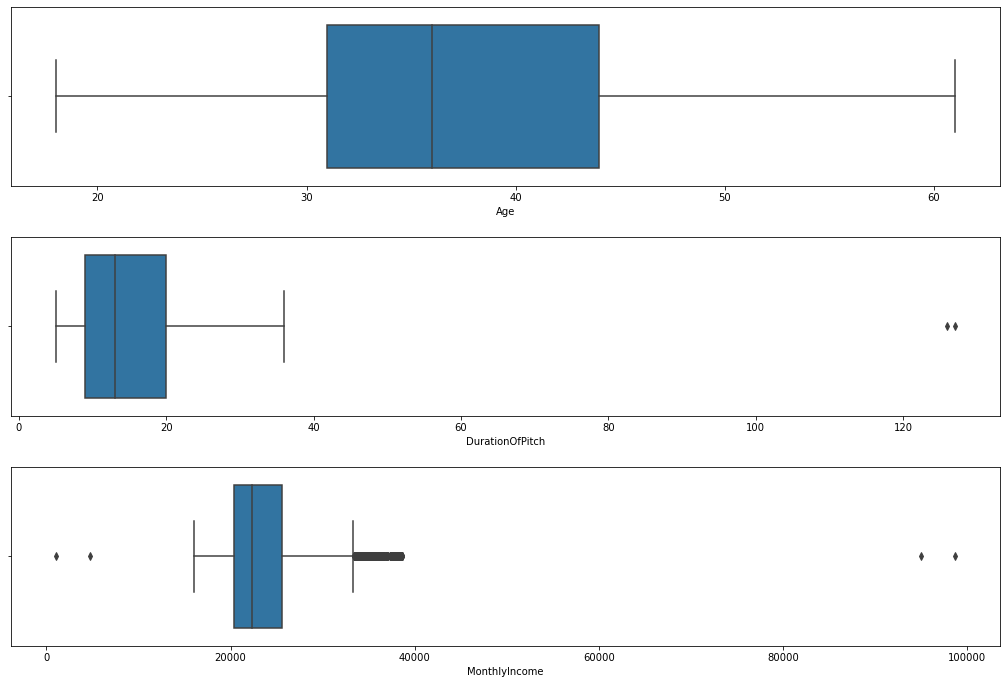

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=customer_travel_package_data,x='Age',ax=axes[0])
sns.boxplot(data=customer_travel_package_data,x='DurationOfPitch',ax=axes[1])
sns.boxplot(data=customer_travel_package_data,x='MonthlyIncome',ax=axes[2])

### Bi-Variate Analysis

We can try to understand the relationship of the individual variables with the target variable, just to understand how each of the variables impact the product purchase.

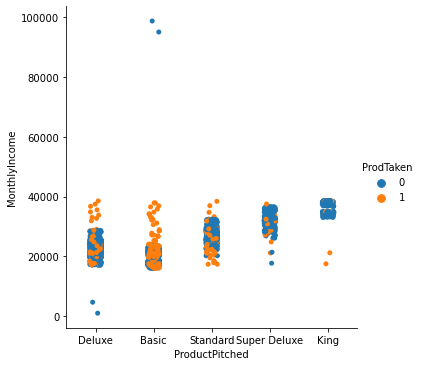

In [16]:
sns.catplot(data=customer_travel_package_data,x='ProductPitched', y='MonthlyIncome', hue='ProdTaken')

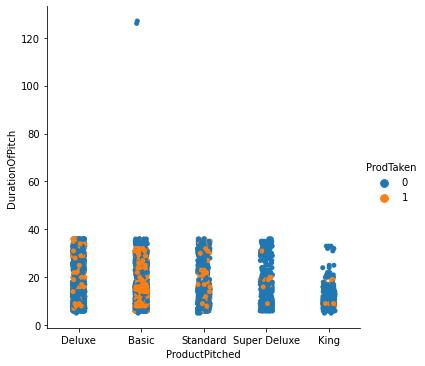

In [17]:
sns.catplot(data=customer_travel_package_data,x='ProductPitched',y='DurationOfPitch', hue='ProdTaken')

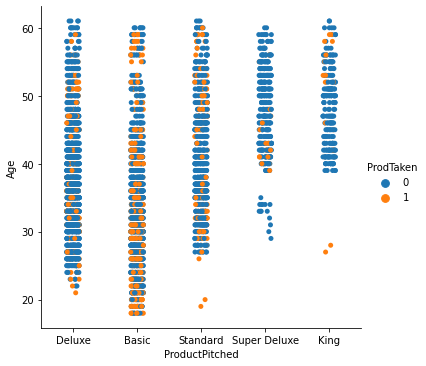

In [18]:
sns.catplot(data=customer_travel_package_data,x='ProductPitched',y='Age', hue='ProdTaken')

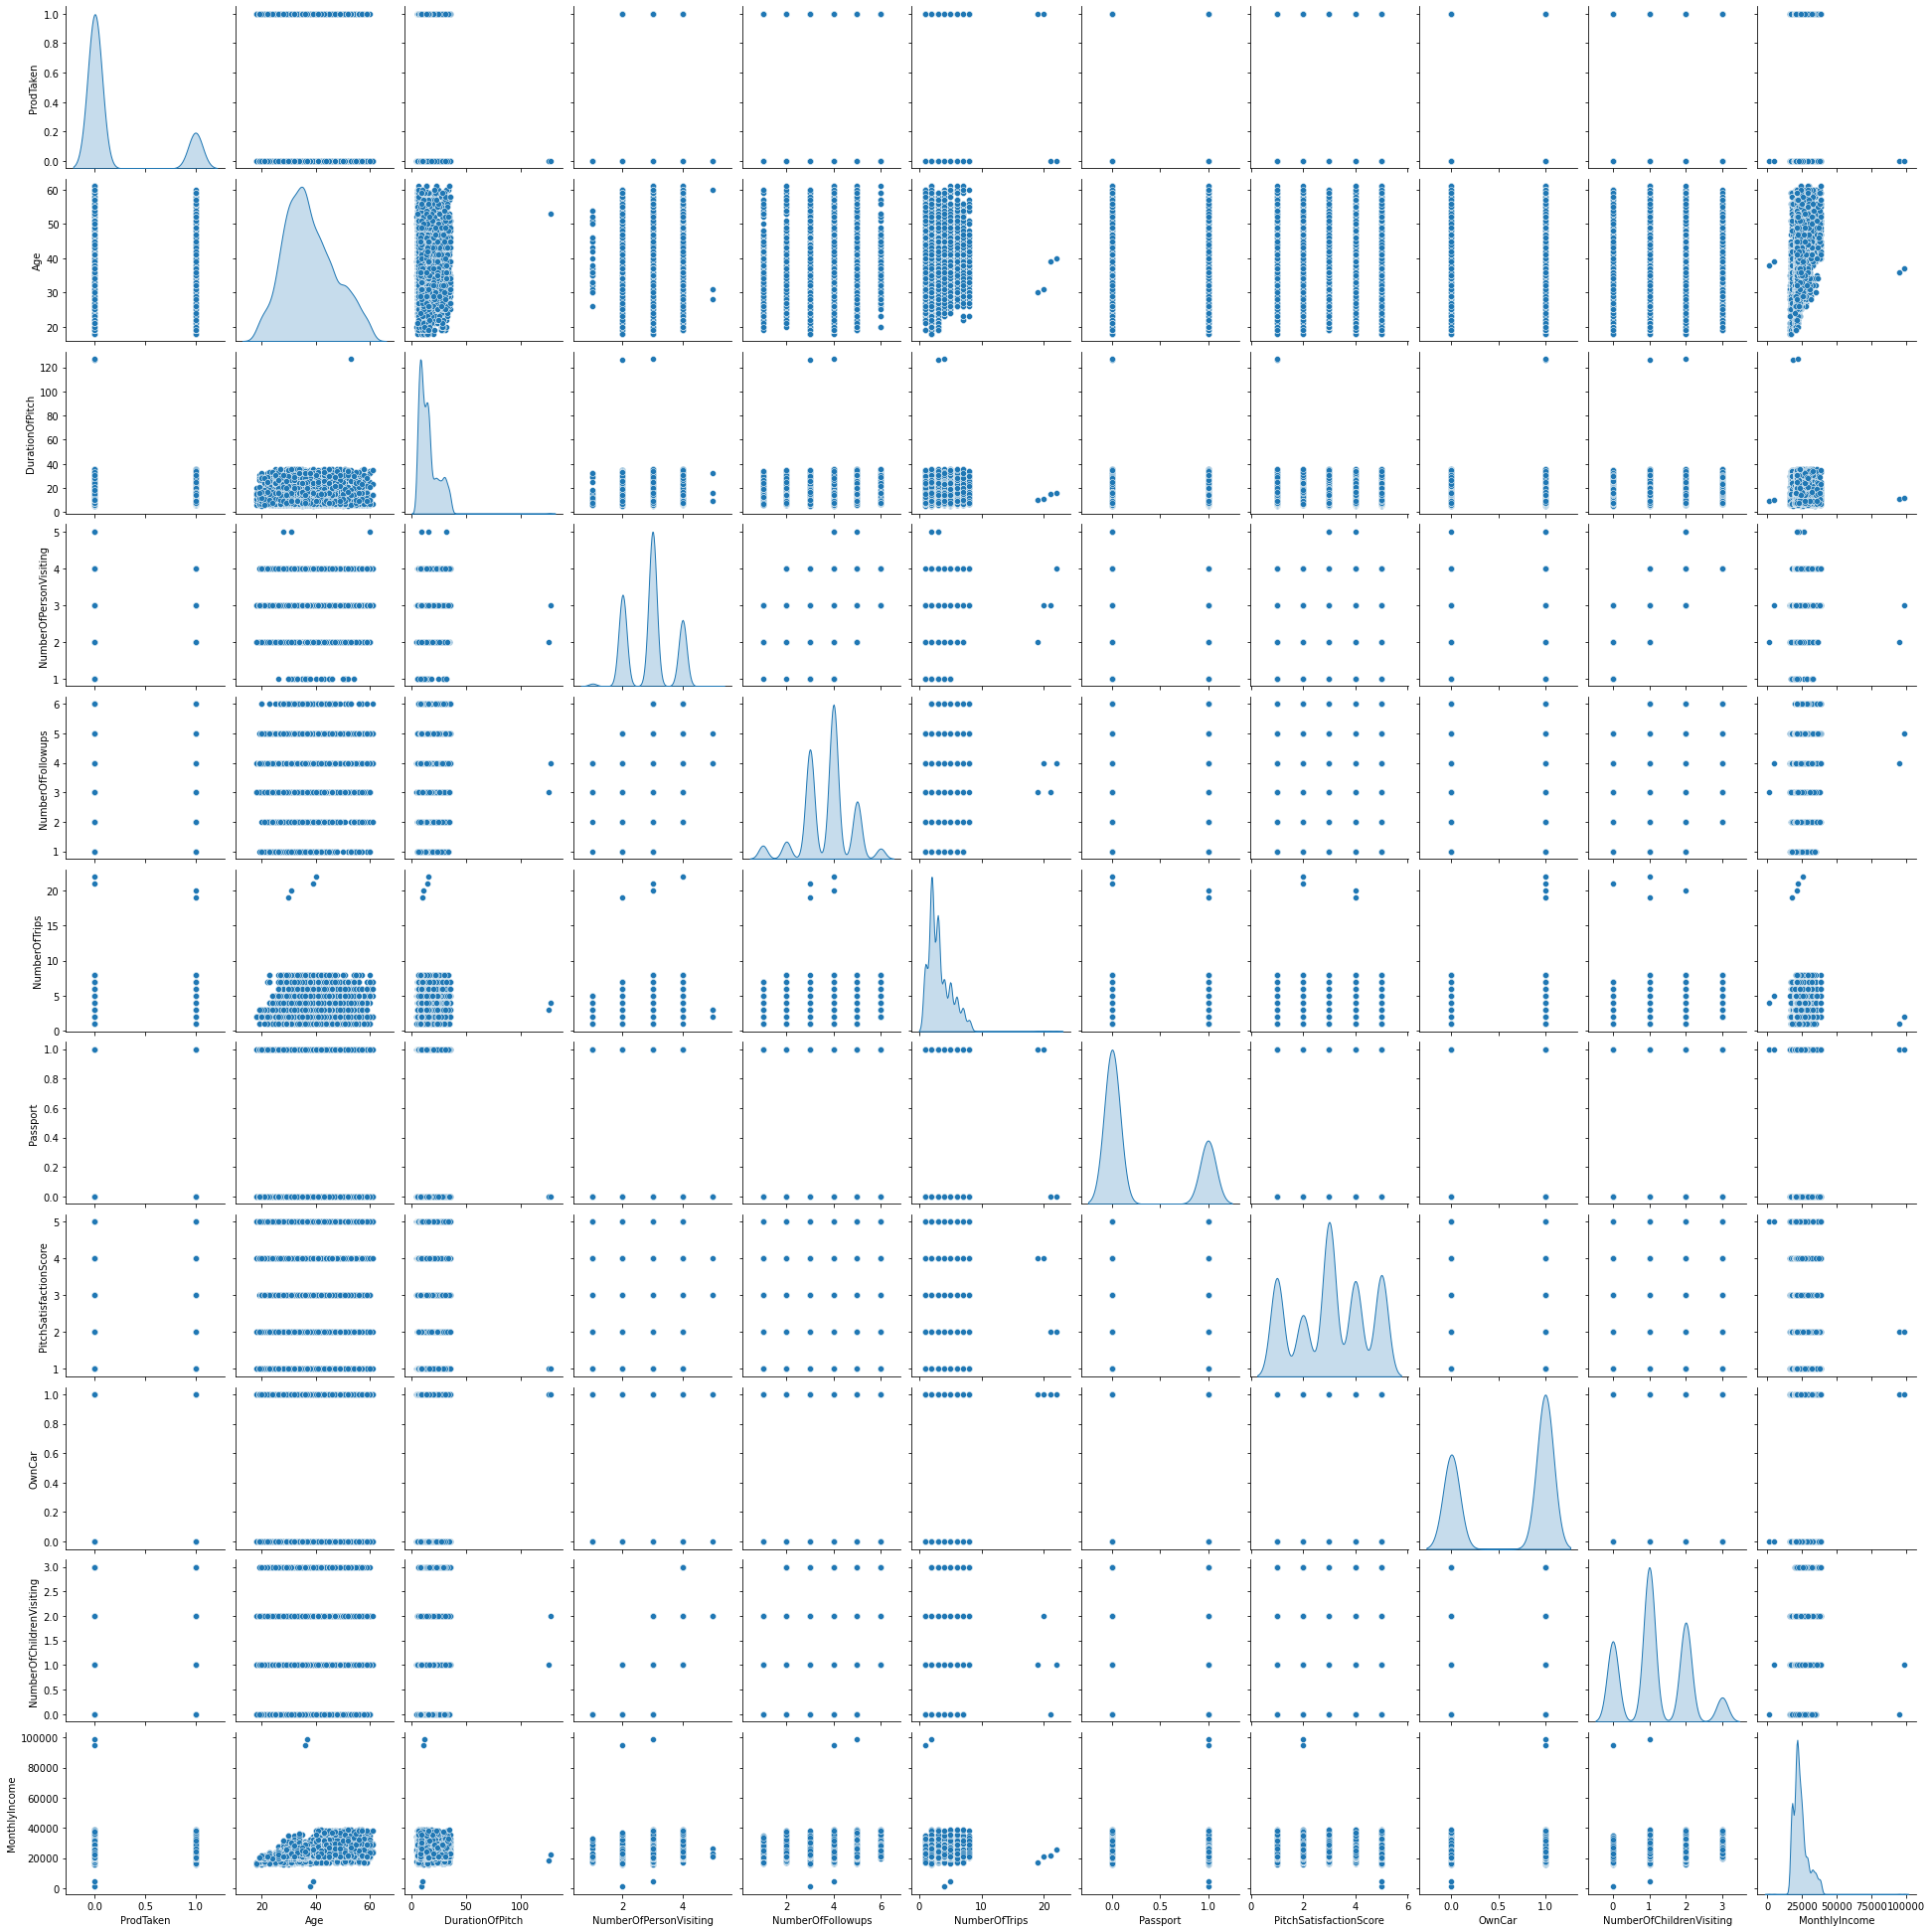

In [19]:
sns.pairplot(data=customer_travel_package_data,diag_kind='kde')

In [20]:
customer_travel_package_data.corr()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.078257,0.009627,0.112171,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.012063,0.011621,-0.002577,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
DurationOfPitch,0.078257,-0.012063,1.000000,0.065141,0.009434,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,0.065141,1.000000,0.328569,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.009434,0.328569,1.000000,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
NumberOfTrips,0.018898,0.184905,0.009715,0.195223,0.139517,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.033034,0.011177,0.004970,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.002880,-0.019581,0.004054,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421
OwnCar,-0.011508,0.048654,-0.001626,0.010362,0.012112,-0.011825,-0.022330,0.068850,1.000000,0.026572,0.080262
NumberOfChildrenVisiting,0.007421,0.007370,0.031408,0.610621,0.286425,0.168795,0.020264,0.000878,0.026572,1.000000,0.201643


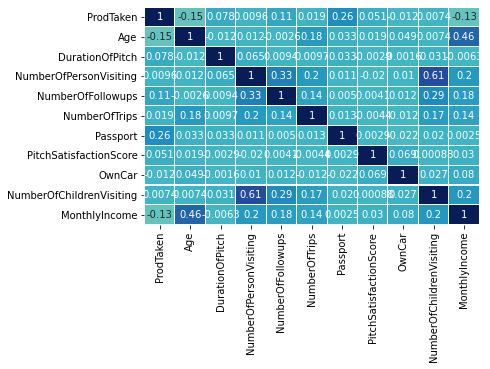

In [21]:
sns.heatmap(customer_travel_package_data.corr(),
            annot=True,
            linewidths=.1,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## Correlation between variables

We don't see strong correlation between most of the variables (both dependent and indpendent) apart from the following where we do mild postive correlation:
* NumberOfPersonVisting -> NumberOfChildrenVisiting: In my opinion number of children visiting is a subset of number of persons visiting (i.e. number of persons include number of children)
* Age -> Monthly income - which is natural and as such it's not very strong.

## Study of Customer Behavior
We would now study the profiles of the customers who baught our different projects. This time we would like to limit our analysis to the customers who said yes to the pitch (i.e. they bought the product).

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

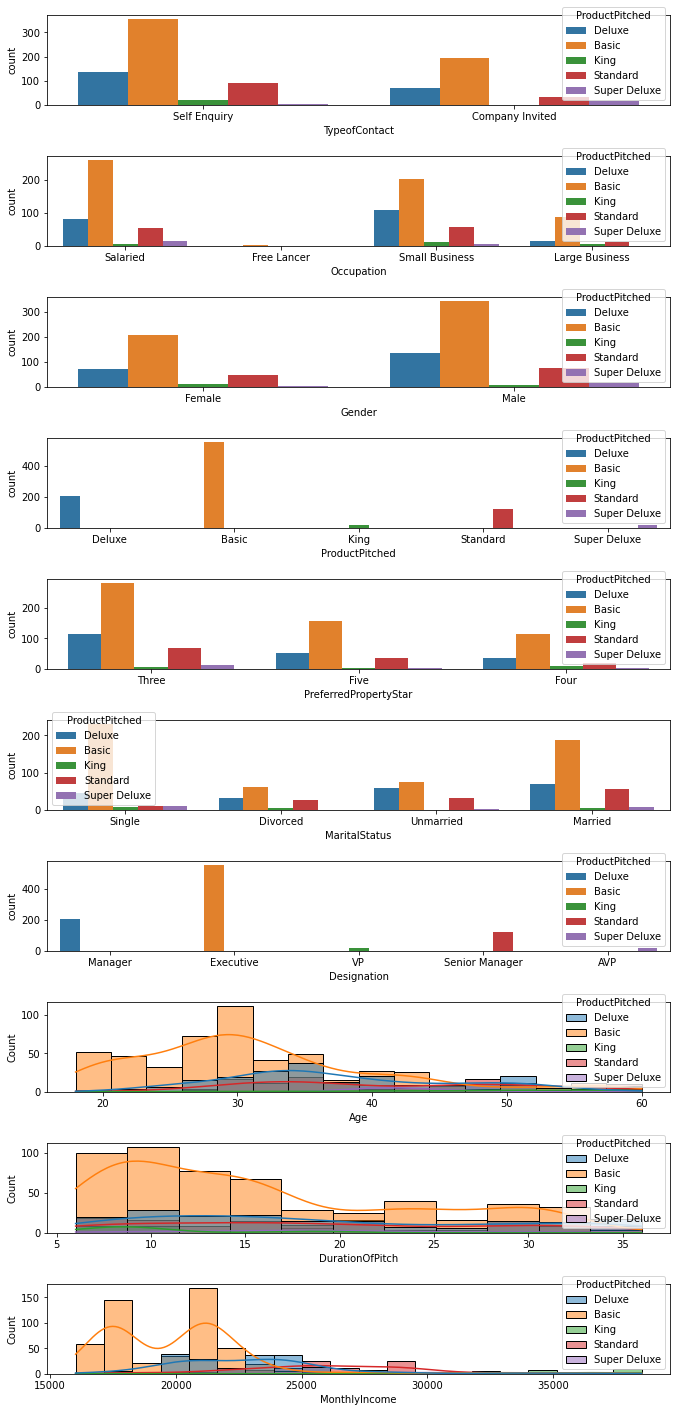

In [22]:
yes_customers = customer_travel_package_data[customer_travel_package_data['ProdTaken']==1]
fig, axes = plt.subplots(10, 1, figsize=(10, 20), sharey=False)
fig.tight_layout(pad=3.0)
sns.countplot(data=yes_customers, x='TypeofContact', hue='ProductPitched', ax=axes[0])
sns.countplot(data=yes_customers, x='Occupation',hue='ProductPitched', ax=axes[1])
sns.countplot(data=yes_customers, x='Gender',hue='ProductPitched',ax=axes[2])
sns.countplot(data=yes_customers, x='ProductPitched',hue='ProductPitched',ax=axes[3])
sns.countplot(data=yes_customers, x='PreferredPropertyStar',hue='ProductPitched',ax=axes[4])
sns.countplot(data=yes_customers, x='MaritalStatus',hue='ProductPitched',ax=axes[5])
sns.countplot(data=yes_customers, x='Designation',hue='ProductPitched',ax=axes[6])
sns.histplot(data=yes_customers, hue='ProductPitched', kde=True, x='Age',ax=axes[7])
sns.histplot(data=yes_customers, hue='ProductPitched', kde=True, x='DurationOfPitch',ax=axes[8])
sns.histplot(data=yes_customers, hue='ProductPitched', kde=True, x='MonthlyIncome',ax=axes[9])

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

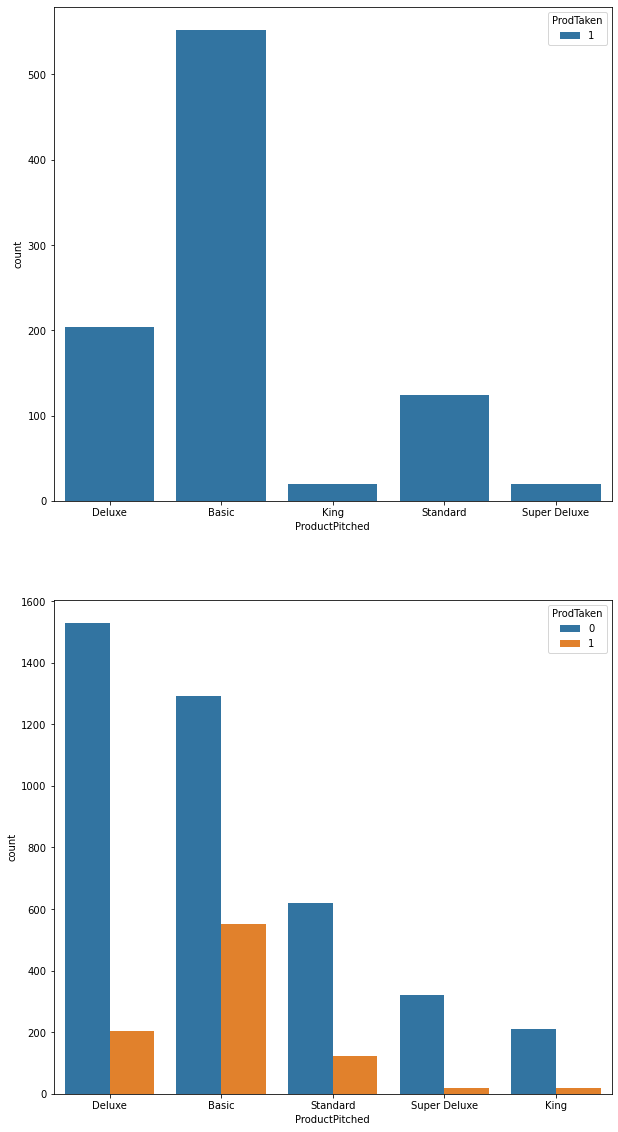

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(10, 20), sharey=False)
sns.countplot(data=yes_customers, x='ProductPitched',hue='ProdTaken', ax=axes[0])
sns.countplot(data=customer_travel_package_data, x='ProductPitched',hue='ProdTaken', ax=axes[1])

Deluxe Conversion Percentage: 11.778290993071593
Basic Conversion Percentage: 29.967426710097723
Standard Conversion Percentage: 16.711590296495956
Super Deluxe Conversion Percentage: 5.847953216374268
King Conversion Percentage: 8.695652173913043


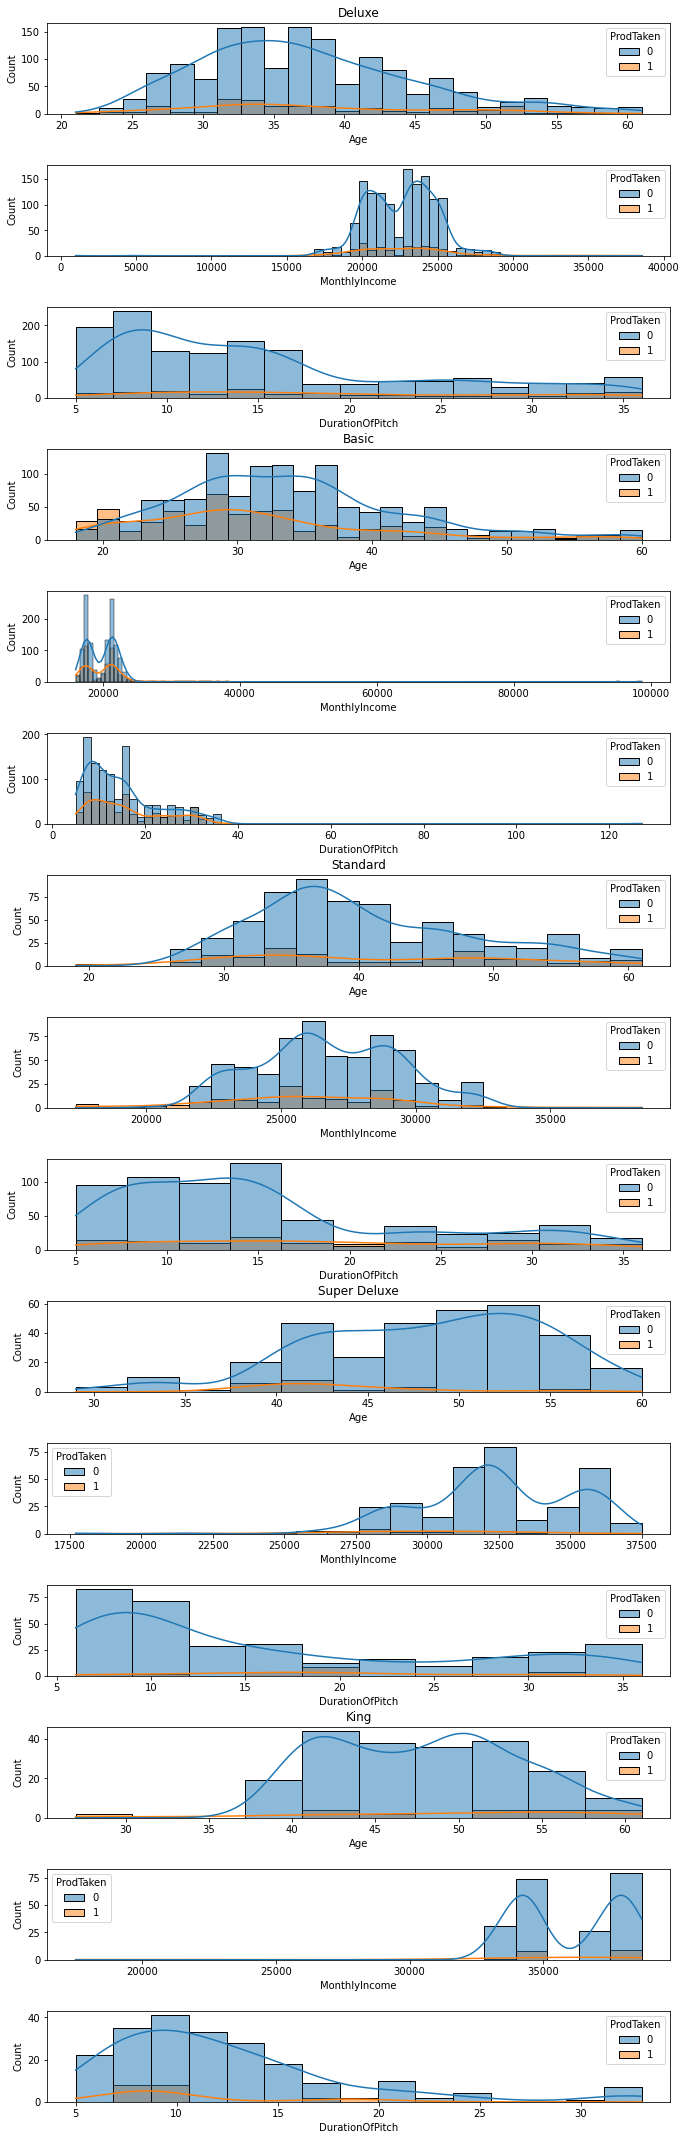

In [24]:
products = ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
fig, axes = plt.subplots(15, 1, figsize=(10, 30), sharey=False)
fig.tight_layout(pad=3.0)
count=0
for product in products:
    pitched_customers = customer_travel_package_data[customer_travel_package_data['ProductPitched']==product]
    start=count*3
    axes[start].set_title(product)
    sns.histplot(data=pitched_customers, hue='ProdTaken', kde=True, x='Age', ax=axes[start])
    sns.histplot(data=pitched_customers, hue='ProdTaken', kde=True, x='MonthlyIncome', ax=axes[start+1])
    sns.histplot(data=pitched_customers, hue='ProdTaken', kde=True, x='DurationOfPitch', ax=axes[start+2])
    pitched_customers_yes = pitched_customers['ProdTaken'].sum()
    pitched_customers_all = pitched_customers['ProdTaken'].count()
    conversion_percentage = (pitched_customers_yes/pitched_customers_all)*100
    print(f'{product} Conversion Percentage: {conversion_percentage}')
    count+=1

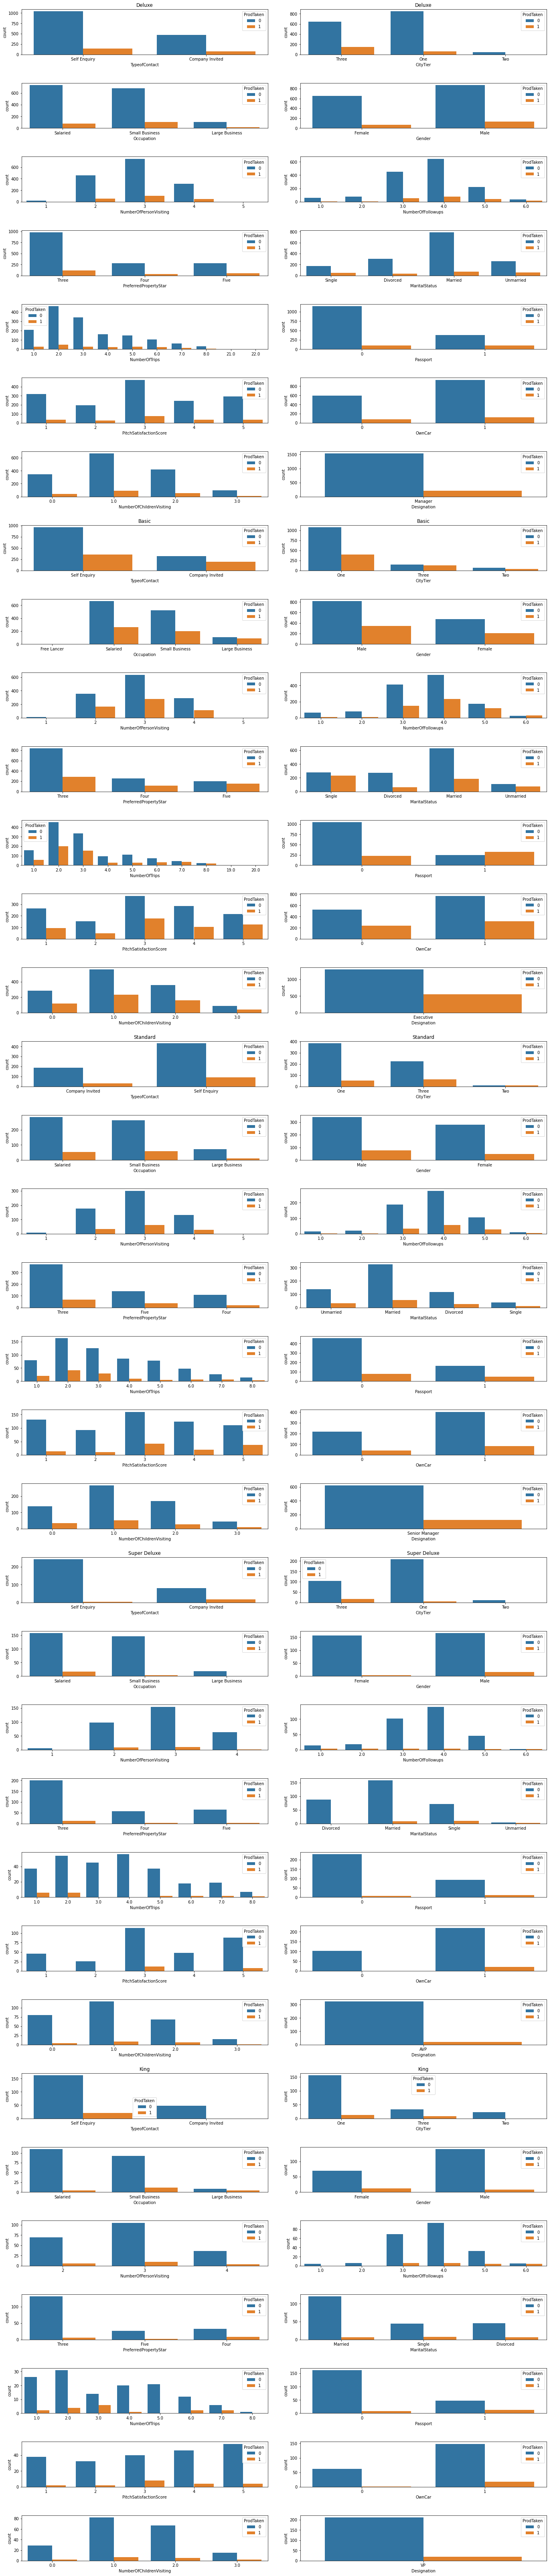

In [25]:
fig, axes = plt.subplots(35, 2, figsize=(20, 90), sharey=False)
fig.tight_layout(pad=5.0)
count=0
for product in products:
    pitched_customers = customer_travel_package_data[customer_travel_package_data['ProductPitched']==product]
    start=count*7
    axes[start][0].set_title(product)
    axes[start][1].set_title(product)
    sns.countplot(data=pitched_customers, x='TypeofContact', hue='ProdTaken', ax=axes[start][0])
    sns.countplot(data=pitched_customers, x='CityTier', hue='ProdTaken', ax=axes[start][1])
    sns.countplot(data=pitched_customers, x='Occupation', hue='ProdTaken', ax=axes[start+1][0])
    sns.countplot(data=pitched_customers, x='Gender', hue='ProdTaken', ax=axes[start+1][1])
    sns.countplot(data=pitched_customers, x='NumberOfPersonVisiting', hue='ProdTaken', ax=axes[start+2][0])
    sns.countplot(data=pitched_customers, x='NumberOfFollowups', hue='ProdTaken', ax=axes[start+2][1])
    sns.countplot(data=pitched_customers, x='PreferredPropertyStar', hue='ProdTaken', ax=axes[start+3][0])
    sns.countplot(data=pitched_customers, x='MaritalStatus', hue='ProdTaken', ax=axes[start+3][1])
    sns.countplot(data=pitched_customers, x='NumberOfTrips', hue='ProdTaken', ax=axes[start+4][0])
    sns.countplot(data=pitched_customers, x='Passport', hue='ProdTaken', ax=axes[start+4][1])
    sns.countplot(data=pitched_customers, x='PitchSatisfactionScore', hue='ProdTaken', ax=axes[start+5][0])
    sns.countplot(data=pitched_customers, x='OwnCar', hue='ProdTaken', ax=axes[start+5][1])
    sns.countplot(data=pitched_customers, x='NumberOfChildrenVisiting', hue='ProdTaken', ax=axes[start+6][0])
    sns.countplot(data=pitched_customers, x='Designation', hue='ProdTaken', ax=axes[start+6][1])
    count+=1

## Product Insights

Our most popular product is **Basic** package with highest conversion rate of 29.97 percent conversion rate. The next most popular product is **Standard** package with a conversion rate of 16.71 percent followed by Deluxe with a conversion rate of 11.78 percent.
Based on the above analysis we can conclude that:
* Even though **Deluxe** package was pitched the most of times it wasn't given an equally enthusiastic response.
* Our product **Basic** package despite being pitched less than **Deluxe** package was purchased more (in absolute figures as well as percentage).
* The. next best performer is **Standard** package.

# Customer Profiles Based On Products
Based on the above analysis for the data from several perspectives we have been able to derive the following conclusions about the customers of different products.

## Deluxe
Customers of Deluxe Product Demonstrate the following Characteristics:
- Age: Between 30-35
- Monthly Income: 22-25K
- Pitch Duration: Mostly around 10-15 minutes
- Potential customers tend to contact us themselves and are mostly from 3 tier cities
- All of the customers who bought this product were managers

## Basic
Basic is the most popular product and got a good response. Here are some the observations around customers of this product.
- Age: Between 28-30
- Monthly Income: 20K-40K
- Are often converted in around 10 minutes 
- Quite popular among non-married folks (single/unmarried).

## Standard
Here are some of the attributes associated with the customers of this package.
- Age Group: Customers are spread across a wide range of age groups (30-50)
- Income: Incomes are also spread across a wide rage (22k to 29K)
- Mostly live in Tier 1 and Tier 3 cities
- Are salaried and small business owners
- All of them are Senior Managers

## Super Deluxe
These customers are:
- Middle aged (38-42)
- Have income levels higher than 25K
- Need a longer pitch (around 20 minutes)
- Are invited through company
- Generally belong to Tier 1 cities
- Are salaried males
- Have their own car
- All of them are AVPs

## King
- Quite popular among aged population 50+ years
- Higher income ~35K
- Are converted in 7-10 minutes of pitching.
- Contact us through self enquiry
- Mostly belong to Tier 3 cities
- Are small businessman or VPs

# Data Pre-processing

Based on the above analysis we can answer a few questions regarding the pre-processing that needs to be performed.
1. Missing Values: We do have a total of around 1% values missing and we need to fix them, we will start by finding the columns which have missing values and then act accordingly. The strategy that we are going to use is as follows:
    
    A. For discrete and String Categorical Values - we will use most_frequent values. Except for the Pitch duration where we also used most_frequent values because in my opinion these are not continuous values and from the understanding of time having decimal values don't make much sense.
    
    B. For continuous values - we will use mean

2. Outliers: We do see outliers in Monthly Income and Pitch Duration. Whether we need to treat outliers is dependent on the model - for example a decision tree doesn't have observable impact of outliers while when boosting (like gradient boosting) outliers can have adverse effects. So for outliers we will take actions depending on the model and do this step right before training the model if needed by the model.

    A. Bagging: Becauuse we will be using decision trees (base case) we will not treat outliers.
    
    B. Boosting: We will try to remove the outliers from the data and see if the model performs any better.

3. Feature Engineering: There are several avenues for feature engineering due to high number of categorical and discrete/ordinal values.
    
    A. We will review the IQR of the discrete values to see how they are spread and what we can do about them (may be use bin counting to reduce the number of classes etc.)
    
    B. Scaling of numerical values: We will scale the numerical values using Standard scalar to bring them in the same range.

In [26]:
# See Missing values per column
missing_values_counts = customer_travel_package_data.isnull().sum()
missing_values_counts[missing_values_counts>0]

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [27]:
# start again to get rid of the temporary encoding done for visualization (like city tier etc.)
customer_travel_package_data = pd.read_excel('Tourism.xlsx', sheet_name='Tourism', engine='openpyxl')
# drop customer id
customer_travel_package_data.drop('CustomerID', axis=1, inplace=True)
# reapply the fix for the gender
customer_travel_package_data['Gender']=customer_travel_package_data['Gender'].apply(fix_female_values)
# impute missing values using SimpleImputer
cleaned_travel_package_data = customer_travel_package_data.copy()
most_frequent_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
most_frequent_object_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
mean_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
cleaned_travel_package_data['Age'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['Age'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['TypeofContact'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['TypeofContact'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['DurationOfPitch'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['DurationOfPitch'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['NumberOfFollowups'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['NumberOfFollowups'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['PreferredPropertyStar'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['PreferredPropertyStar'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['NumberOfTrips'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['NumberOfTrips'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['NumberOfChildrenVisiting'] = most_frequent_imputer.fit_transform(cleaned_travel_package_data['NumberOfChildrenVisiting'].values.reshape(-1,1))[:,0]
cleaned_travel_package_data['MonthlyIncome'] = mean_imputer.fit_transform(cleaned_travel_package_data['MonthlyIncome'].values.reshape(-1,1))[:,0]

cleaned_travel_package_data.isnull().sum().sum() # should be zero

0

## Review the spread of Discrete Values
Discrete/Ordinal values present in the data are:
- CityTier: Because this is an important aspect of the customer attributes (see customer profiles above) - we will simply one hot encode this.
- NumberOfPersonVisiting: Keep it as is.
- NumberOfFollowups: Keep it as is.
- PreferredPropertyStar: I will convert this into 2 bins - less than 4 stars and greater than equal to 4 stars.
- NumberOfTrips: I will keep it as is.
- PitchSatisfactionScore: Becase 3 is the mid point - here I will create 2 bins - less than 3, greater than equal to 3.
- NumberOfChildrenVisiting: keep it as is

These actions are based on the analysis done in the next cell.

<AxesSubplot:xlabel='NumberOfChildrenVisiting'>

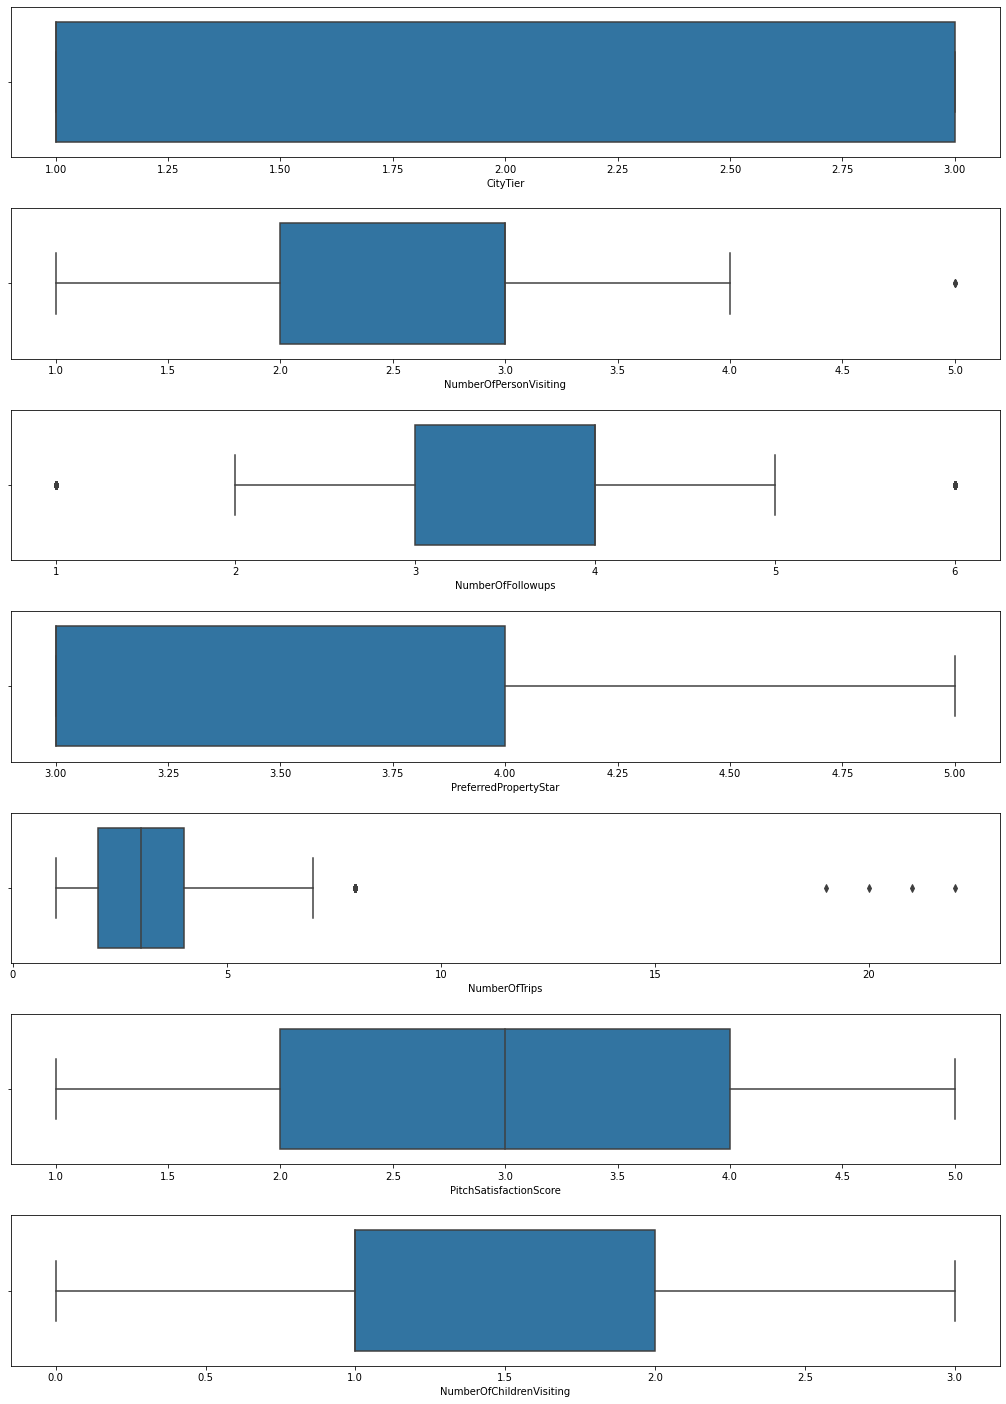

In [28]:
fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)
sns.boxplot(data=cleaned_travel_package_data,x='CityTier',ax=axes[0])
sns.boxplot(data=cleaned_travel_package_data,x='NumberOfPersonVisiting',ax=axes[1])
sns.boxplot(data=cleaned_travel_package_data,x='NumberOfFollowups',ax=axes[2])
sns.boxplot(data=cleaned_travel_package_data,x='PreferredPropertyStar',ax=axes[3])
sns.boxplot(data=cleaned_travel_package_data,x='NumberOfTrips',ax=axes[4])
sns.boxplot(data=cleaned_travel_package_data,x='PitchSatisfactionScore',ax=axes[5])
sns.boxplot(data=cleaned_travel_package_data,x='NumberOfChildrenVisiting',ax=axes[6])

In [ ]:
cleaned_travel_package_data.info()

In [29]:
# helper functions to apply the ancoding
def encode_property_star(value):
    if value>=4.0:
        return 'GT_4'
    return 'LT_4'
def encode_pitch_score(value):
    if value>=3:
        return 'GT_3'
    return 'LT_3'
# convert to categories (and encode if needed)
cleaned_travel_package_data['CityTier']=cleaned_travel_package_data['CityTier'].astype('category')
cleaned_travel_package_data['PreferredPropertyStar']=cleaned_travel_package_data['PreferredPropertyStar'].apply(encode_property_star)
cleaned_travel_package_data['PitchSatisfactionScore']=cleaned_travel_package_data['PitchSatisfactionScore'].apply(encode_pitch_score)
cleaned_travel_package_data.info()
                                                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   object  
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   object  
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   object  
 10  PreferredPropertyStar     4888 non-null   object  
 11  MaritalStatus             4888 non-null   object  
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

In [30]:
category_columns = [
    'TypeofContact', 
    'Occupation', 
    'Gender', 
    'ProductPitched', 
    'PreferredPropertyStar', 
    'MaritalStatus', 
    'Passport', 
    'PitchSatisfactionScore', 
    'OwnCar', 
    'Designation']
for column in category_columns:
    cleaned_travel_package_data[column]=cleaned_travel_package_data[column].astype('category')

cleaned_travel_package_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [31]:
# now get dummy variables for the categories
cleaned_travel_package_data = pd.get_dummies(cleaned_travel_package_data)
cleaned_travel_package_data.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,...,Passport_1,PitchSatisfactionScore_GT_3,PitchSatisfactionScore_LT_3,OwnCar_0,OwnCar_1,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,6.0,3,3.0,1.0,0.0,20993.0,0,1,...,1,0,1,0,1,0,0,1,0,0
1,0,49.0,14.0,3,4.0,2.0,2.0,20130.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1,37.0,8.0,3,4.0,7.0,0.0,17090.0,0,1,...,1,1,0,1,0,0,1,0,0,0
3,0,33.0,9.0,2,3.0,2.0,1.0,17909.0,1,0,...,1,1,0,0,1,0,1,0,0,0
4,0,35.0,8.0,2,3.0,1.0,0.0,18468.0,0,1,...,0,1,0,0,1,0,1,0,0,0


Split the dataframe into X (independent variables) and y (dependent variables)

In [32]:
y = cleaned_travel_package_data['ProdTaken']
X = cleaned_travel_package_data.drop('ProdTaken', axis=1)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X.shape: (4888, 40)
y.shape: (4888,)
X_train.shape: (3421, 40)
X_test.shape: (1467, 40)
y_train.shape: (3421,)
y_test.shape: (1467,)


# Model evaluation helpers
These functions below are helpers to do a couple of things:
- Get the metrics of model performance
- Create a confusion matrix based on model performance against the labels.

In [33]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Decision tree classifier
Starting off with a simple decision tree classifier with random_state=1 to have repeatable results.

Accuracy on training set :  1.0
Accuracy on test set :  0.8752556237218814
Recall on training set :  1.0
Recall on test set :  0.6666666666666666
Precision on training set :  1.0
Precision on test set :  0.6690909090909091
F1-Score on training set :  1.0
F1-Score on test set :  0.6678765880217786


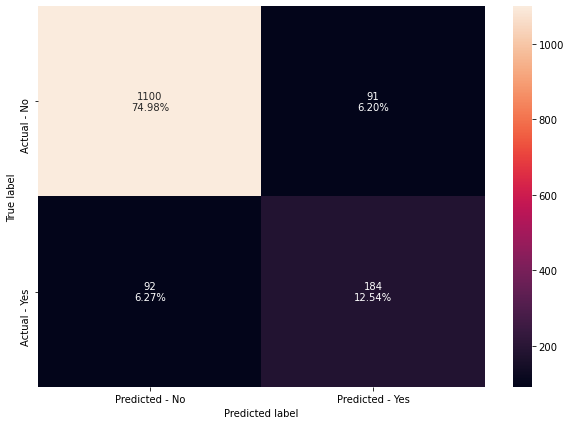

In [34]:
#Fitting the model
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(decision_tree)

#Creating confusion matrix
make_confusion_matrix(decision_tree,y_test)

# Decision tree classifier
- Model is overfitting on the training set and performing bad on the test set.

Let us experiment with the hyper parameters to see if we can improve the model performance. We are going to try the following hyperparameters.
- adjusting class_weights: This would help in assigning more weight to negatives class (i.e. reducing the false negatives). I can live with acceptable number of false positives because I want to maximize sales.
- max_depth: max_depth of the tree before branching a new node.
- min_samples_leaf: min number of leafs required at a leaf node.
- max_leaf_nodes: maximum number of nodes to reduce impurity
- min_impurity_decrease: Threshold for split in terms of impurity reduction

Accuracy on training set :  0.7351651563870213
Accuracy on test set :  0.7368779822767553
Recall on training set :  0.7220496894409938
Recall on test set :  0.7137681159420289
Precision on training set :  0.3901006711409396
Precision on test set :  0.39087301587301587
F1-Score on training set :  0.5065359477124184
F1-Score on test set :  0.5051282051282051


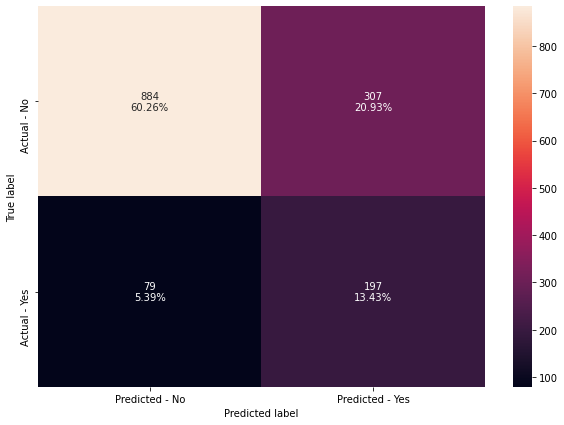

In [35]:
#Choose the type of classifier. 
decision_tree_tuned = DecisionTreeClassifier(class_weight={0:0.18,1:0.82},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0005,0.005,0.05,0.5]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(decision_tree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
decision_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
decision_tree_tuned.fit(X_train, y_train)
get_metrics_score(decision_tree_tuned)
make_confusion_matrix(decision_tree_tuned,y_test)

# Tuned Decision Tree Performance
- The model not overfitting the test data and is able to generalize good across test data as well.
- The accuracy and recall are comprable across training and test sets, however overall model performance is not great.

# Default Random Forest Classifier
Let's start with vanilla Random Forest to see how it performs on our dataset.

Accuracy on training set :  1.0
Accuracy on test set :  0.9154737559645535
Recall on training set :  1.0
Recall on test set :  0.5942028985507246
Precision on training set :  1.0
Precision on test set :  0.9318181818181818
F1-Score on training set :  1.0
F1-Score on test set :  0.7256637168141593


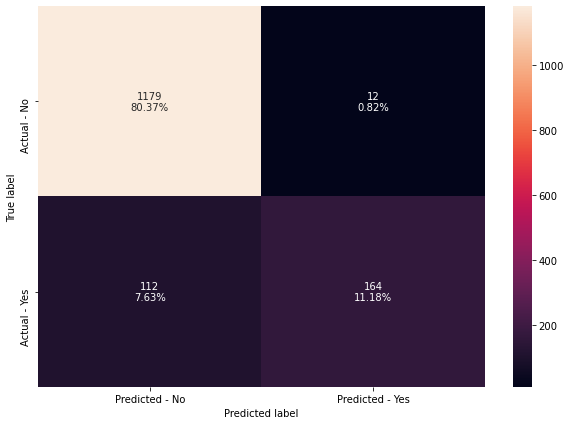

In [36]:
#Fitting the model
random_forest_classifier = RandomForestClassifier(random_state=1)
random_forest_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(random_forest_classifier)

#Creating confusion matrix
make_confusion_matrix(random_forest_classifier,y_test)

# Default Random Forest Classifier: Results
- The model is overfitting on the training data however the performance is not great on test data (especially recall).
- Let's try to tune the model and see if we can get any better performance

# Tuned Random Forest Classifier
We will tune the following parameters on the Random Forest to see if we can get a better performance - the goals remain the same as listed earlier. We will experiment with the following parameters
- class_weight: Assigning more weight to positive class to be able to focus on potential customers to maximize sales
- max_depth: max depth for trees
- max_features: max features per tree
- min_samples_leaf: minimum number of samples per leaf node.
- min_samples_split: split samples threshold
- n_estimators: number of estimators

Accuracy on training set :  0.9859690149079217
Accuracy on test set :  0.9134287661895024
Recall on training set :  0.9906832298136646
Recall on test set :  0.6811594202898551
Precision on training set :  0.9382352941176471
Precision on test set :  0.8281938325991189
F1-Score on training set :  0.9637462235649548
F1-Score on test set :  0.7475149105367793


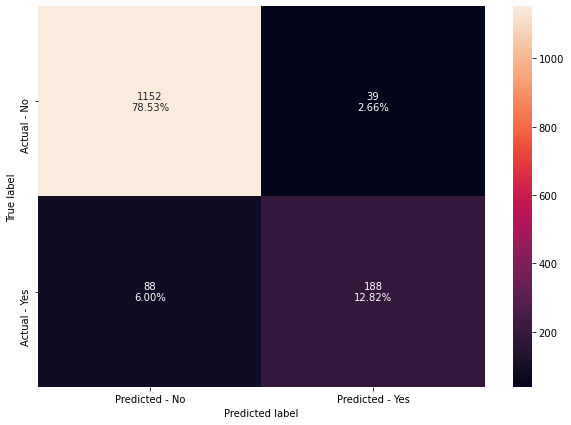

In [37]:
# Choose the type of classifier. 
random_forest_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True, n_jobs=-1)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(random_forest_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
random_forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
random_forest_tuned.fit(X_train, y_train)
#Calculating different metrics
get_metrics_score(random_forest_tuned)

#Creating confusion matrix
make_confusion_matrix(random_forest_tuned,y_test)

# Tuned Random Forest Classifier: Results
- Overfitting: Model is slightly overfitting the training data.
- Model performance: Recall is not great on Test data which means that model is struggling to eliminate false negatives that we want to minimize. F1 score is also not very great which we do care as it is the harmonic mean of precision and recall.

# Bagging Classifier

Let's evaluate the data with a default Bagging Classifier without any hyperparameter tuning.

Accuracy on training set :  0.9915229465068693
Accuracy on test set :  0.901840490797546
Recall on training set :  0.9596273291925466
Recall on test set :  0.5688405797101449
Precision on training set :  0.9951690821256038
Precision on test set :  0.8626373626373627
F1-Score on training set :  0.9770750988142292
F1-Score on test set :  0.685589519650655


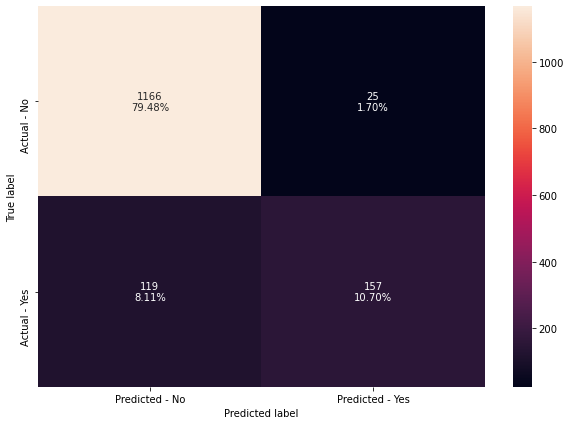

In [38]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

# Bagging Classifier: Results
- Overfitting: The model is overfitting.
- Model performance: Recall and F1 scores on test data are not good which means that the model is struggling to come up with good predictions for our use case.

# Tuned Bagging Classifier
Let's try and tune the bagging classifier. We will tune the following parameters on the bagging classifier.
- max_samples: maximum nuumber of samples with replacement
- max_features: maximum number of features split per estimator
- n_estimators: number of estimators for bootstrap aggregation

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9195637355146558
Recall on training set :  0.9984472049689441
Recall on test set :  0.6376811594202898
Precision on training set :  1.0
Precision on test set :  0.9072164948453608
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7489361702127658


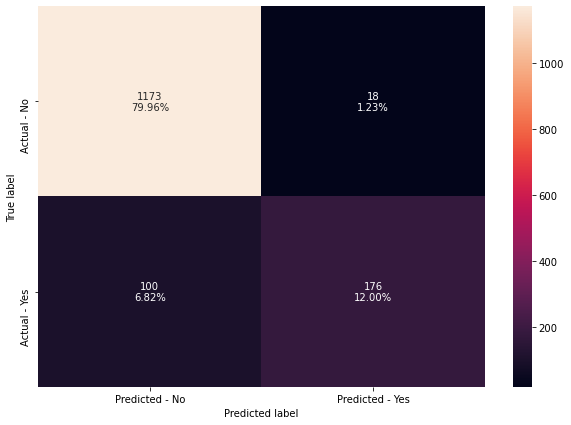

In [39]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1, n_jobs=-1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

# Tuned Bagging Classifier: Results
- Overfitting: The model is overfitting and is not able to generalize well on test data.
- Model Performance: Model performance is better than vanilla Bagging classifier but it has overfitted on the training data by a great deal.

The most important metric in my understanding is maximizing Recall for our model. We want to minimize the false positives. We want to maximize sales and as such would not want to incorrectly flag a potential customer who might have converted. The pitching campaigns are relatively cheap to organize and if we have can focus on every potential customer we will see improvement in sales.

# Boosting

We will start with Boosting algorithms now. Our goal would be to maximize recall and F1 scores so that we can have an efficient predictive model.

# Adaboost Default Model
We will start with default implementation of Adaboost without any hyperparameter tuning.

Accuracy on training set :  0.8494592224495762
Accuracy on test set :  0.8479890933878664
Recall on training set :  0.3198757763975155
Recall on test set :  0.31521739130434784
Precision on training set :  0.7279151943462897
Precision on test set :  0.71900826446281
F1-Score on training set :  0.4444444444444444
F1-Score on test set :  0.4382871536523929


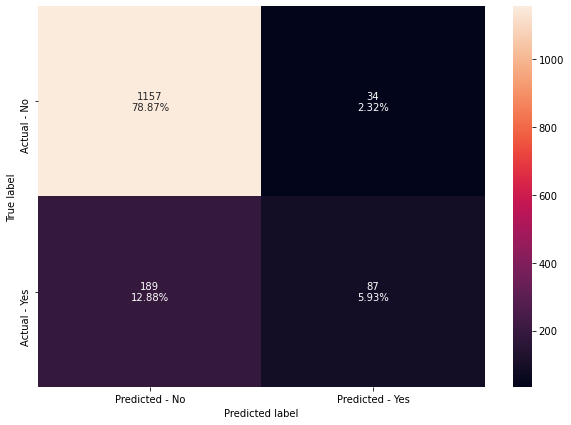

In [40]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

# Adaboost Default Model: Results
- Overfitting: Model is underfitting somewhat - which means that it is not able to catch enough information.
- Model Performance: Both the metrics that we care about are very bad on the test data, model is giving good accuracy on both test and traning data which means that it is biased towards majority class (negative in this case)

# Adaboost Tuned Model
We will try to tune the model and experiment with the following hyperparameters.
- Varying depth decision trees as base_estimator
- n_estimators: Number of estimators for the ensemble
- learning_rate: different learning rates for convergence.
- cv: crossvalidation splitting with default 5 fold strategy

Accuracy on training set :  0.9918152586962876
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.967391304347826
Recall on test set :  0.5760869565217391
Precision on training set :  0.9888888888888889
Precision on test set :  0.7004405286343612
F1-Score on training set :  0.978021978021978
F1-Score on test set :  0.63220675944334


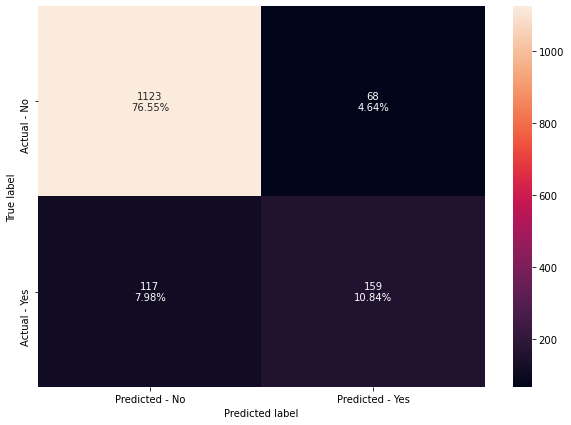

In [41]:
# Choose the type of classifier. 
adaboost_classifier_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(adaboost_classifier_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
adaboost_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adaboost_classifier_tuned.fit(X_train, y_train)
#Calculating different metrics
get_metrics_score(adaboost_classifier_tuned)

#Creating confusion matrix
make_confusion_matrix(adaboost_classifier_tuned,y_test)

# Adaboost Tuned Model: Results
- Overfitting: Model is overfitting
- Performance: Model performance is very bad and both the metrics that we care about are quite low.

# Gradientboost Default Model

Building a Gradient Boost Model with default parameters.

Accuracy on training set :  0.884536685179772
Accuracy on test set :  0.8663940013633266
Recall on training set :  0.4503105590062112
Recall on test set :  0.3804347826086957
Precision on training set :  0.8761329305135952
Precision on test set :  0.8076923076923077
F1-Score on training set :  0.5948717948717949
F1-Score on test set :  0.517241379310345


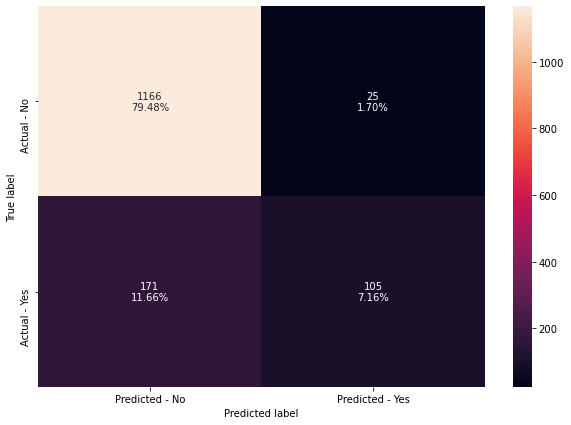

In [42]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

# Gradientboost Default Model: Results
- Overfitting: Model is underfitting
- Performance: Model performance is not very good and both the metrics that we care about are quite low.

# Gradientboost Tuned Model
Let's try the model with tuned GB

Accuracy on training set :  0.9213680210464776
Accuracy on test set :  0.8807089297886844
Recall on training set :  0.6195652173913043
Recall on test set :  0.4891304347826087
Precision on training set :  0.9432624113475178
Precision on test set :  0.7988165680473372
F1-Score on training set :  0.7478912839737581
F1-Score on test set :  0.6067415730337078


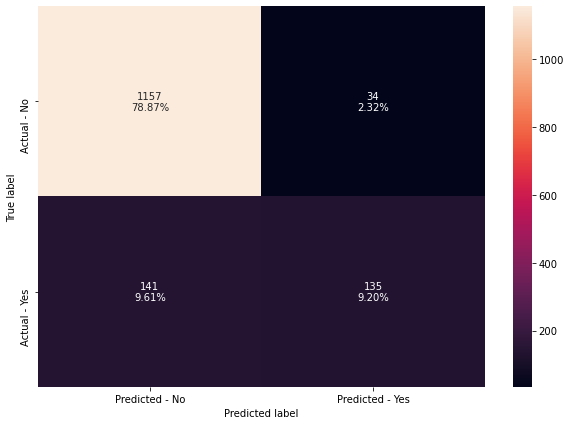

In [43]:
# Choose the type of classifier. 
gb_classifier_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_classifier_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_classifier_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(gb_classifier_tuned)

#Creating confusion matrix
make_confusion_matrix(gb_classifier_tuned,y_test)

# Gradientboost Tuned Model: Results
- Overfitting: The model is overfitting
- Performance is bad for both metric that we care about - it is however performing better than vanilla Gradient Boost

# XGBoost Default Model
Default XGBoost Implementation without any hyper-parameter tuning.

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9209270620313565
Recall on training set :  0.9984472049689441
Recall on test set :  0.644927536231884
Precision on training set :  1.0
Precision on test set :  0.9081632653061225
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7542372881355932


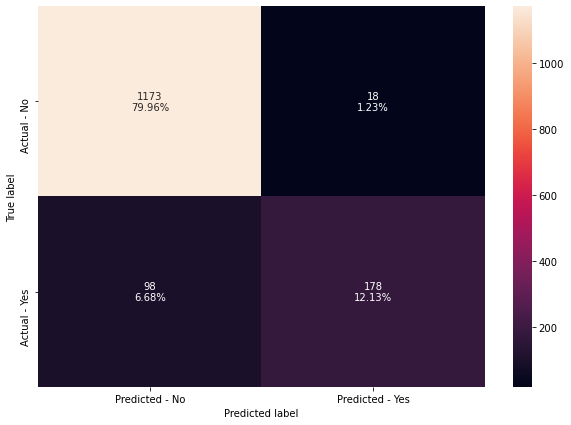

In [44]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

# XGBoost Tuned Model
XGBoost hyperparameters tuned Implementation the following hyper-parameters tuned.

- eval_metric: 
- n_estimators: Number of estimators
- scale_pos_weight: ratio of negative & positive classes
- subsample: ratio of subsampling the training instances
- learning_rate: control overfitting by shrinking feature weights by the factor specified in the learning rate
- colsample_bytree: number of columns for subsampling when creating a new tree
- colsample_bylevel: number of columns to subsample at each level.

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[2,4,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

# XGBoost Tuned Model: Results
- Overfitting: The model is not overfitting as such and is able to generalize well
- Model performance: Both Recall and F1 scores are better in this case.

# Stacking Classifier
Next we will build a stacking classifier model with default parameters.

In [ ]:
estimators = [('Random Forest',random_forest_tuned), ('Gradient Boosting',gb_classifier_tuned), ('Decision Tree',decision_tree)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

# Stacking Classifier: Results
- Overfitting: The model is not overfitting as such and is able to generalize well
- Model performance: Both Recall and F1 scores are acceptable and model performance is decent.

# Model Comparision
We can now compare all the trained models and see which one performed the best

In [ ]:
# defining list of models
models = [decision_tree, 
          decision_tree_tuned,
          random_forest_classifier,
          random_forest_tuned,
          bagging_classifier,
          bagging_estimator_tuned,
          ab_classifier, 
          adaboost_classifier_tuned, 
          gb_classifier, 
          gb_classifier_tuned, 
          xgb_classifier,
          xgb_tuned,
          stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

comparison_frame = pd.DataFrame({'Model':
                                 ['Decision Tree',
                                  'Tuned Decision Tree',
                                  'Random Forest',
                                  'Tuned Random Forest',
                                  'Bagging Classifier',
                                  'Bagging Classifier Tuned',
                                  'AdaBoost Classifier',
                                  'Tuned AdaBoost Classifier',
                                  'Gradient Boosting Classifier', 
                                  'Tuned Gradient Boosting Classifier',
                                  'XGBoost Classifier',  
                                  'Tuned XGBoost Classifier', 
                                  'Stacking Classifier'], 
                                  'Train_Accuracy': acc_train,
                                  'Test_Accuracy': acc_test,
                                  'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test})

In [ ]:
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

# Best Performing Models
The top 2 best performing models are **Stacking Classifier** & **Tuned XGBoost**.
It would be interesting to know the feature importances for Tuned XGboost to see what are interesting variables related to the domain.

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model performance evaluation

The best model is stacking classifier built with tuned models which are not performing so well individually but when combined in a stacking ensemble we get best performance.

# Scope for improvements

The following can be thought of in terms of improving the model performance.
- scaling values: for gradient boosting and xgboost algorithms - an additional experiment with scaled values could be taken up to see if we get a better performance because of the gradients (residuals).
- Getting rid of the outliers: we have a few extreme values for MonthlyIncome and DurationOfPitch variables. We can try to get rid of these and see if we get any better predictions.
- Trying stacking with more permutations of other weak learners.

# Actionable Insights & Recommendations

The following recommendations can be provided based on the data:
- Basic model has the best conversion rate.
- The customer base for Basic package is also very well distributed across the different demographic parameters.
- We can try to create a new product by combining the offerings of Basic and Standard packages to create a new package, we can send out surveys to our customers to collect feedback about the features that they liked about each product.
- We should revisit our offerings under Deluxe as the package is worst perfoming in terms of conversion, we can use market segementation to understand what our customers are looking for.